### LSE Data Analytics Online Career Accelerator

# DA201: Data Analytics using Python

## Assignment template: COVID-19 data

## Student Note
This template can be used to better understand the suggested assignment workflow and how to approach the questions. You are welcome to add code and Markdown blocks to the various sections to add either code or comments. Make sure to add code cells as applicable, and to comment all your code blocks.

You have the option to populate your Notebook with all the elements typically contained within the report, or to submit a separate report. In the case of submitting your Notebook, you can embed images, links and text where appropriate in addition to the text notes added.

**SPECIAL NOTE**
- Submit your Jupyter Notebook with the following naming convention: `LSE_DA201_assignment_[your name]_[your surname]` (remove the square brackets).
- You should submit a zipped folder containing all the elements used in your Notebook (data files, images, etc.).

> ***Markdown notes:*** Remember to change cell types to `Markdown`. You can review [Markdown basics](https://docs.github.com/en/get-started/writing-on-github/getting-started-with-writing-and-formatting-on-github/basic-writing-and-formatting-syntax) to find out how to add formatted text, links and images to your Markdown documents.

## 0) Environment preparation
These settings are provided for you. You do not need to make any changes.

In [1]:
# Import the required libraries and set the plotting options
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

sns.set(rc = {'figure.figsize':(15,10)})

### Required: Report submission:

- [My Github Repo](https://github.com/PollyannaHadley/LSE_DA_COVID_analysis)
- Screenshot demo (replace with your own).

!['My Github screenshot](https://github.com/PollyannaHadley/LSE_DA_COVID_analysis/blob/FINAL-submission/Picture1.png?raw=true)


### 1.2) Presentation expectations:
- Describe the role and how workflow tools such as GitHub can be used to add value to organisations.

### Optional for notebook/Required for presentation.
- You can use this cell as placeholder for bullet points to include in your presentation. 
- This section will not be graded in the Notebook, grades awarded based on presentation content only. 

(Double-click to edit)

## 2) Assignment activity 2: 

### 2.1) Report expectations:
- Load the files `covid_19_uk_cases.csv` and `covid_19_uk_vaccinated.csv` and explore the data.
- Explore the data using the `info()`, `describe()`, `shape` and `value_counts()` methods, and note the observations regarding data types, number or records and features.
- Identify missing data.
- Filter/subset data.
- Aggregate data (totals and by month).
- Note observations.

In [2]:
# Load the COVID-19 cases and vaccine data sets as cov and vac respectively.
import pandas as pd
import numpy as py

cov = pd.read_csv('covid_19_uk_cases.csv')
vac = pd.read_csv('covid_19_uk_vaccinated.csv')

###### Review of the COVID cases dataset

In [3]:
# Review of covid cases data set for type and shape.
print(cov.dtypes)
print(cov.shape)

Province/State               object
Country/Region               object
Lat                         float64
Long                        float64
ISO 3166-1 Alpha 3-Codes     object
Sub-region Name              object
Intermediate Region Code      int64
Date                         object
Deaths                      float64
Cases                       float64
Recovered                   float64
Hospitalised                float64
dtype: object
(7584, 12)


In [4]:
# Print first five rows.
cov.head()

,Province/State,Country/Region,Lat,Long,ISO 3166-1 Alpha 3-Codes,Sub-region Name,Intermediate Region Code,Date,Deaths,Cases,Recovered,Hospitalised
0,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-22,0.0,0.0,0.0,0.0
1,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-23,0.0,0.0,0.0,0.0
2,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-24,0.0,0.0,0.0,0.0
3,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-25,0.0,0.0,0.0,0.0
4,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-26,0.0,0.0,0.0,0.0


In [5]:
# Print last five rows
cov.tail()


,Province/State,Country/Region,Lat,Long,ISO 3166-1 Alpha 3-Codes,Sub-region Name,Intermediate Region Code,Date,Deaths,Cases,Recovered,Hospitalised
7579,Others,United Kingdom,55.3781,-3.436,GBR,Northern Europe,0,2021-10-10,137735.0,8154306.0,0.0,378.0
7580,Others,United Kingdom,55.3781,-3.436,GBR,Northern Europe,0,2021-10-11,137763.0,8193769.0,0.0,386.0
7581,Others,United Kingdom,55.3781,-3.436,GBR,Northern Europe,0,2021-10-12,137944.0,8231437.0,0.0,386.0
7582,Others,United Kingdom,55.3781,-3.436,GBR,Northern Europe,0,2021-10-13,138080.0,8272883.0,0.0,0.0
7583,Others,United Kingdom,55.3781,-3.436,GBR,Northern Europe,0,2021-10-14,138237.0,8317439.0,0.0,0.0


In [6]:
# Check for missing values.
cov_na = cov[cov.isna().any(axis=1)]

cov_na.shape

(2, 12)

The above output indicates 2 out of the 7,584 rows of data contain missing values. The next step is to view the rows containing the missing values to determing how this could impact analysis.

In [7]:
# Identify the two lines of missing data.
cov.loc[cov.isnull().any(axis=1)]

,Province/State,Country/Region,Lat,Long,ISO 3166-1 Alpha 3-Codes,Sub-region Name,Intermediate Region Code,Date,Deaths,Cases,Recovered,Hospitalised
875,Bermuda,United Kingdom,32.3078,-64.7505,BMU,Northern America,0,2020-09-21,NaN,NaN,NaN,NaN
876,Bermuda,United Kingdom,32.3078,-64.7505,BMU,Northern America,0,2020-09-22,NaN,NaN,NaN,NaN


The output for missing rows shows data concerning the deaths, cases, recoveries and hopitalisations is missing for two consecutive days. Given the missing days also relate to the same province, we will continue on the basis that issues arising from the missing data is localised. Lines will not be removed as it is not expected to have a significant impact on the analysis however we should be mindful if we observe any ususal trends around September 2020.

###### Initial review of descriptive statistics for COVD cases data set

In [8]:
# Generate summary of descriptive statistics for cases across all provinces.
cov.describe()

,Lat,Long,Intermediate Region Code,Deaths,Cases,Recovered,Hospitalised
count,7584.000000,7584.000000,7584.000000,7582.000000,7.582000e+03,7582.000000,7582.000000
mean,21.840267,-41.440047,12.500000,6210.202321,2.147082e+05,454.691242,685.228568
std,28.305518,30.527529,14.009849,24860.790148,1.007557e+06,1010.642337,819.256635
min,-51.796300,-81.254600,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,17.851075,-64.667625,0.000000,0.000000,1.200000e+01,0.000000,105.000000
50%,20.503650,-60.855483,2.500000,1.000000,1.685000e+02,13.000000,390.000000
75%,39.448675,-5.152225,29.000000,25.000000,1.585000e+03,312.000000,955.750000
max,55.378100,-2.364400,29.000000,138237.000000,8.317439e+06,8322.000000,4907.000000


###### Review of the COVID vacinations dataset

In [9]:
# Review of covid vacinations data for type and shape
print(vac.dtypes)
print(vac.shape)


Province/State               object
Country/Region               object
Lat                         float64
Long                        float64
ISO 3166-1 Alpha 3-Codes     object
Sub-region Name              object
Intermediate Region Code      int64
Date                         object
Vaccinated                    int64
First Dose                    int64
Second Dose                   int64
dtype: object
(7584, 11)


In [10]:
# Print first five rows.
vac.head()


,Province/State,Country/Region,Lat,Long,ISO 3166-1 Alpha 3-Codes,Sub-region Name,Intermediate Region Code,Date,Vaccinated,First Dose,Second Dose
0,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-22,0,0,0
1,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-23,0,0,0
2,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-24,0,0,0
3,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-25,0,0,0
4,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-26,0,0,0


In [11]:
# Print last five rows.
vac.tail()

,Province/State,Country/Region,Lat,Long,ISO 3166-1 Alpha 3-Codes,Sub-region Name,Intermediate Region Code,Date,Vaccinated,First Dose,Second Dose
7579,Others,United Kingdom,55.3781,-3.436,GBR,Northern Europe,0,2021-10-10,1070,1216,1070
7580,Others,United Kingdom,55.3781,-3.436,GBR,Northern Europe,0,2021-10-11,1300,1604,1300
7581,Others,United Kingdom,55.3781,-3.436,GBR,Northern Europe,0,2021-10-12,1482,2027,1482
7582,Others,United Kingdom,55.3781,-3.436,GBR,Northern Europe,0,2021-10-13,0,0,0
7583,Others,United Kingdom,55.3781,-3.436,GBR,Northern Europe,0,2021-10-14,0,0,0


In [12]:
# Check for missing values.
vac_na = vac[vac.isna().any(axis=1)]

vac_na.shape

(0, 11)

Shows no missing data in the rows from the vaccinations dataset.

###### Initial review of descriptive statistics for COVD vaccinations data set

In [13]:
# Generate summary of descriptive statistics for vaccinations across all provinces.
vac.describe()

,Lat,Long,Intermediate Region Code,Vaccinated,First Dose,Second Dose
count,7584.000000,7584.000000,7584.000000,7584.000000,7584.000000,7584.000000
mean,21.840267,-41.440047,12.500000,5913.547600,6192.822257,5913.547600
std,28.305518,30.527529,14.009849,10846.410258,11439.883647,10846.410258
min,-51.796300,-81.254600,0.000000,0.000000,0.000000,0.000000
25%,17.851075,-64.667625,0.000000,0.000000,0.000000,0.000000
50%,20.503650,-60.855483,2.500000,0.000000,0.000000,0.000000
75%,39.448675,-5.152225,29.000000,8338.000000,7505.500000,8338.000000
max,55.378100,-2.364400,29.000000,69619.000000,94038.000000,69619.000000


To further explore the data, the vaccinations information is aggregated to summarise and total at a province level.

In [14]:
# Sum number of vaccinations by region.
# Create subset for analysis.
vac_stats = vac[['Province/State', 'Vaccinated', 'First Dose', 'Second Dose']]

# Total the number of vaccinations by Location.
vac_stats.groupby('Province/State').sum().sort_values(by='Vaccinated', ascending=False)

,Vaccinated,First Dose,Second Dose
Province/State,,,
Gibraltar,5606041,5870786,5606041
Montserrat,5157560,5401128,5157560
British Virgin Islands,4933315,5166303,4933315
Anguilla,4709072,4931470,4709072
Isle of Man,4036345,4226984,4036345
Falkland Islands (Malvinas),3587869,3757307,3587869
Cayman Islands,3363624,3522476,3363624
Channel Islands,3139385,3287646,3139385
Turks and Caicos Islands,2915136,3052822,2915136


The output above shows that out of all provinces, Gibralter has the highest number of fully vaccinations, with Saint Helena, Ascension and Tristan da Cunha having the least. 
This summary has also highlighted that there is an "Other" category however it is unclear how many regions/provinces this is made up of.

The next step of initial analysis is looking at the vaccinations over time to identify any initial insights:

In [15]:
# Group by date
# Sum number of vaccinations by region.
# Create subset for analysis.
vac_by_month = vac[['Date', 'Vaccinated', 'First Dose', 'Second Dose']]

# Total the number of vaccinations by Location.
vac_by_month.groupby('Date').sum().sort_values(by='Date')

,Vaccinated,First Dose,Second Dose
Date,,,
2020-01-22,0,0,0
2020-01-23,0,0,0
2020-01-24,0,0,0
2020-01-25,0,0,0
2020-01-26,0,0,0
...,...,...,...
2021-10-10,19452,22105,19452
2021-10-11,23633,29171,23633
2021-10-12,26945,36847,26945


The above output shows vaccinations in these provinces first started in January 2021 and continuted through to October 2021 which is the latest month in our data set. There are clearly fluctuations on a daily basis which can be explored further through visualisations.

###### Initial review and description statistics for Gibraltar

As a first step, we will further review Gibraltar's statistics to review the descriptive statistics to compare against the results across all provinces. Gibraltar has been selected as a starting point since they have the highest volumes of fully vaccinated individuals.

In [16]:
# Creating DataFrame for Gibraltar data.
cov_gib = cov[cov['Province/State'] == 'Gibraltar']

# View the Gibralter DataFrame.
pd.set_option('display.max_rows', None)

cov_gib

,Province/State,Country/Region,Lat,Long,ISO 3166-1 Alpha 3-Codes,Sub-region Name,Intermediate Region Code,Date,Deaths,Cases,Recovered,Hospitalised
3792,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-22,0.0,0.0,0.0,0.0
3793,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-23,0.0,0.0,0.0,0.0
3794,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-24,0.0,0.0,0.0,0.0
3795,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-25,0.0,0.0,0.0,0.0
3796,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-26,0.0,0.0,0.0,0.0
3797,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-27,0.0,0.0,0.0,0.0
3798,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-28,0.0,0.0,0.0,0.0
3799,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-29,0.0,0.0,0.0,0.0
3800,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-30,0.0,0.0,0.0,0.0
3801,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-31,0.0,0.0,0.0,0.0


In [17]:
# Creating subset to further analyse.
cov_gib_stats = cov_gib[['Deaths', 'Cases', 'Recovered', 'Hospitalised']]

# View first five rows to check as expected.
cov_gib_stats.head()

,Deaths,Cases,Recovered,Hospitalised
3792,0.0,0.0,0.0,0.0
3793,0.0,0.0,0.0,0.0
3794,0.0,0.0,0.0,0.0
3795,0.0,0.0,0.0,0.0
3796,0.0,0.0,0.0,0.0


In [18]:
# Collate summary of descriptive statistics.
cov_gib_stats.describe()

,Deaths,Cases,Recovered,Hospitalised
count,632.000000,632.000000,632.000000,632.000000
mean,40.208861,2237.109177,1512.821203,1027.625000
std,45.332832,2136.268090,1817.096755,1145.681058
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,177.000000,109.500000,157.750000
50%,5.000000,1036.500000,323.500000,675.500000
75%,94.000000,4286.000000,4122.500000,1548.000000
max,97.000000,5727.000000,4670.000000,4907.000000


In [19]:
# Re-run descriptive statistics to compare to all province statistics
cov.describe()

,Lat,Long,Intermediate Region Code,Deaths,Cases,Recovered,Hospitalised
count,7584.000000,7584.000000,7584.000000,7582.000000,7.582000e+03,7582.000000,7582.000000
mean,21.840267,-41.440047,12.500000,6210.202321,2.147082e+05,454.691242,685.228568
std,28.305518,30.527529,14.009849,24860.790148,1.007557e+06,1010.642337,819.256635
min,-51.796300,-81.254600,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,17.851075,-64.667625,0.000000,0.000000,1.200000e+01,0.000000,105.000000
50%,20.503650,-60.855483,2.500000,1.000000,1.685000e+02,13.000000,390.000000
75%,39.448675,-5.152225,29.000000,25.000000,1.585000e+03,312.000000,955.750000
max,55.378100,-2.364400,29.000000,138237.000000,8.317439e+06,8322.000000,4907.000000


When comparing the initial descriptive statistics for Gibraltar to all other regions, the daily average hospitalisation rates are noteably higher in Gibraltar, despite overall higher volumns of vaccinated individuals (fully and one dose only). However average daily recoveries in Gibraltar are higher than average which could suggest the effectivevness of the vaccine from death.

I would want to further explore the reasons behind these findings and review the results over a time series to gain further insight. For example could this be due to differences in province factors, such as timing lag between the first recorded case and the implementation of the vaccination scheme, covid restrictions/lockdown, effciciency of healthcare services and availability of the vaccines.

Death and cases rates statistics have been ingnored at this stage as there appears to be data points skewing the findings for in the all provinces results. Potential outliers are reviewed later in the analysis.


### 2.2) Presentation expectations:
Use the process of exploring the data for Gibraltar as an example to provide a brief description of the various phases to help your team to understand the process. Keep it high level and make sure to focus on both specifics relating to the case (first dose, second dose per region, total and over time) and brief observations regarding the process. Assignment activity 2 considers basic data exploration.
- Can we make decisions based on total numbers only, or do trends over time offer additional insights?
- Why it is important to explore the data, what are the typical mistakes made in this phase?

## 3) Assignment activity 3: 

### 3.1) Report expectations:
- Merge and explore the data.
- Convert the data type of the Date column from object to DateTime.
- Create a data set that meets the expected parameters.
- Add calculated features to DataFrames (difference between first and second dose vaccinations).
- Filter and sort output.
- Observe totals and percentages as a total and over time.
- Note observations.

Merge the DataFrames without duplicating columns. The new DataFrame (e.g. `covid`) will have `7584` rows and the following columns: `Province/State, Country/Region, Date, Vaccinated, First Dose, Second Dose, Deaths, Cases, Recovered, Hospitalised`.

###### Merge of DataFrames
To prepare for further analysis, the two DataFrames have been merged to allow for analysis to be performed on the entire dataset.
The Date column is currenly an object and has been converted to a DateTime object which will allow for the data to be grouped by date.

In [20]:
# Join the DataFrames as covid where you merge cov and vac.
# Create a variable to merge the DataFrames based on multiple columns.
merge_data = cov.merge(vac, on=['Province/State', 'Country/Region', 'Date',])

# Create a new DataFrame to show the required columns only.
covid = merge_data[['Province/State', 'Country/Region', 'Date', 'Vaccinated',
                   'First Dose', 'Second Dose', 'Deaths', 'Cases', 'Recovered',
                   'Hospitalised']]

# View new covid DataFrame.
print(covid.dtypes)
print(covid.shape)
covid.head()

Province/State     object
Country/Region     object
Date               object
Vaccinated          int64
First Dose          int64
Second Dose         int64
Deaths            float64
Cases             float64
Recovered         float64
Hospitalised      float64
dtype: object
(7584, 10)


,Province/State,Country/Region,Date,Vaccinated,First Dose,Second Dose,Deaths,Cases,Recovered,Hospitalised
0,Anguilla,United Kingdom,2020-01-22,0,0,0,0.0,0.0,0.0,0.0
1,Anguilla,United Kingdom,2020-01-23,0,0,0,0.0,0.0,0.0,0.0
2,Anguilla,United Kingdom,2020-01-24,0,0,0,0.0,0.0,0.0,0.0
3,Anguilla,United Kingdom,2020-01-25,0,0,0,0.0,0.0,0.0,0.0
4,Anguilla,United Kingdom,2020-01-26,0,0,0,0.0,0.0,0.0,0.0


In [21]:
# Explore the new DataFrame.
# Fix the date column data type and add a column to present as YYYY-MM.
covid['Date'] = pd.to_datetime(covid['Date'], format='%Y-%m-%d')
covid['Year_Month'] = pd.to_datetime(covid['Date']).dt.to_period('M')

"""Warnings may appear due to attempting to set a copy of a slice of a DataFrame.
Ignore this warning as no impact on analysis """

print(covid.dtypes)
covid.head()


Province/State            object
Country/Region            object
Date              datetime64[ns]
Vaccinated                 int64
First Dose                 int64
Second Dose                int64
Deaths                   float64
Cases                    float64
Recovered                float64
Hospitalised             float64
Year_Month             period[M]
dtype: object


C:\Users\polly\AppData\Local\Temp/ipykernel_153736/4027118058.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid['Date'] = pd.to_datetime(covid['Date'], format='%Y-%m-%d')
C:\Users\polly\AppData\Local\Temp/ipykernel_153736/4027118058.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid['Year_Month'] = pd.to_datetime(covid['Date']).dt.to_period('M')


,Province/State,Country/Region,Date,Vaccinated,First Dose,Second Dose,Deaths,Cases,Recovered,Hospitalised,Year_Month
0,Anguilla,United Kingdom,2020-01-22,0,0,0,0.0,0.0,0.0,0.0,2020-01
1,Anguilla,United Kingdom,2020-01-23,0,0,0,0.0,0.0,0.0,0.0,2020-01
2,Anguilla,United Kingdom,2020-01-24,0,0,0,0.0,0.0,0.0,0.0,2020-01
3,Anguilla,United Kingdom,2020-01-25,0,0,0,0.0,0.0,0.0,0.0,2020-01
4,Anguilla,United Kingdom,2020-01-26,0,0,0,0.0,0.0,0.0,0.0,2020-01


###### Analysis of first and second doses by Location
The next step taken is to summarise and review the number of individuals who have been fully and partially vaccinated by Province. 
Partially vaccinated individuals can be defined as receiving the first vaccination only.

In [22]:
# Clean up / drop unnecessary columns.
# Create new DataFrame to exclude Date and Country.
covid_analysis = covid[['Province/State', 'Vaccinated',
                   'First Dose', 'Second Dose', 'Deaths', 'Cases', 'Recovered',
                   'Hospitalised']]

# Groupby to view by Province/State.
covid_by_state = covid_analysis.groupby('Province/State', axis=0).sum().sort_values(by='Vaccinated', ascending=False)

# Data types converted to integers to tidy presentations in summary.
covid_by_state['Deaths'] = covid_by_state['Deaths'].astype(int)
covid_by_state['Cases'] = covid_by_state['Cases'].astype(int)
covid_by_state['Recovered'] = covid_by_state['Recovered'].astype(int)
covid_by_state['Hospitalised'] = covid_by_state['Hospitalised'].astype(int)

# Groupby and calculate difference between first and second dose.
covid_by_state['Partially Vaccinated'] = covid_by_state['First Dose'] - covid_by_state['Second Dose']
covid_by_state['Partially Vaccinated %'] = covid_by_state['Partially Vaccinated'] / covid_by_state['First Dose']*100

# Add a column to calculate percentage uptake of second does.
covid_by_state['Fully vaccinated %'] = (covid_by_state['Second Dose'] / covid_by_state['First Dose'])*100

# View aggregated sum by Province/State.
covid_by_state

,Vaccinated,First Dose,Second Dose,Deaths,Cases,Recovered,Hospitalised,Partially Vaccinated,Partially Vaccinated %,Fully vaccinated %
Province/State,,,,,,,,,,
Gibraltar,5606041,5870786,5606041,25412,1413853,956103,649459,264745,4.509532,95.490468
Montserrat,5157560,5401128,5157560,539,9556,6376,597486,243568,4.509577,95.490423
British Virgin Islands,4933315,5166303,4933315,3573,284961,64359,571506,232988,4.509763,95.490237
Anguilla,4709072,4931470,4709072,24,35315,12708,545540,222398,4.509771,95.490229
Isle of Man,4036345,4226984,4036345,15051,887133,328319,467605,190639,4.510048,95.489952
Falkland Islands (Malvinas),3587869,3757307,3587869,0,20482,14754,415650,169438,4.509560,95.490440
Cayman Islands,3363624,3522476,3363624,911,217756,152052,389669,158852,4.509669,95.490331
Channel Islands,3139385,3287646,3139385,37130,1957978,1027626,363690,148261,4.509640,95.490360
Turks and Caicos Islands,2915136,3052822,2915136,5612,752618,515923,337710,137686,4.510122,95.489878


###### Observations
The analysis shows Gibralter has the highest number of individuals who are partially vaccinated, however Turks and Caicos Islands have the highest percentage of individuals who are only partially vaccinated.

The numbers of cases and deaths for province 'Others' appears to be unually large compared to the other data sets and perhaps suggests these are outliers and likely to skew later analysis.



###### Analysis of first and second doses over time
To understand how the number and proportion of fully and partially vaccinated individuals has changed over time, the merged dataset has been analysed on a monthly basis with result cumulated.

In [23]:
# Groupby and calculate the difference between first and second dose over time.
covid_time_agg = covid[['Province/State', 'Year_Month', 'Vaccinated',
                   'First Dose', 'Second Dose', 'Deaths', 'Cases', 'Recovered',
                   'Hospitalised']]

# View the changes of vaccine update overtime.
covid_timeline = covid_time_agg.groupby(['Year_Month']).agg('sum').cumsum()

# Data types converted to integers to tidy presentations in summary.
covid_timeline['Deaths'] = covid_timeline['Deaths'].astype(int)
covid_timeline['Cases'] = covid_timeline['Cases'].astype(int)
covid_timeline['Recovered'] = covid_timeline['Recovered'].astype(int)
covid_timeline['Hospitalised'] = covid_timeline['Hospitalised'].astype(int)

# Groupby and calculate difference between first and second dose.
covid_timeline['Partially Vaccinated'] = covid_timeline['First Dose'] - covid_timeline['Second Dose']
covid_timeline['Partially Vaccinated %'] = covid_timeline['Partially Vaccinated'] / covid_timeline['First Dose']*100

# Add a column to calculate percentage uptake of second does.
covid_timeline['Fully vaccinated %'] = (covid_timeline['Second Dose'] / covid_timeline['First Dose'])*100

# View accumulated volumes over time.
covid_timeline


,Vaccinated,First Dose,Second Dose,Deaths,Cases,Recovered,Hospitalised,Partially Vaccinated,Partially Vaccinated %,Fully vaccinated %
Year_Month,,,,,,,,,,
2020-01,0,0,0,0,2,0,0,0,NaN,NaN
2020-02,0,0,0,0,608,116,0,0,NaN,NaN
2020-03,0,0,0,12580,283807,2045,48763,0,NaN,NaN
2020-04,0,0,0,469796,3612151,16925,604104,0,NaN,NaN
2020-05,0,0,0,1500545,10628861,49715,935433,0,NaN,NaN
2020-06,0,0,0,2683219,18842218,88533,1084948,0,NaN,NaN
2020-07,0,0,0,3953880,27962618,131974,1147062,0,NaN,NaN
2020-08,0,0,0,5238678,37896377,178739,1177818,0,NaN,NaN
2020-09,0,0,0,6493165,49460523,240697,1217239,0,NaN,NaN


###### Observations
The analysis above shows that there was a sharp increase in the number of vaccinations between January and April 2021, with a steady continuance of vacciations later in the year, tailing off towards October 2021.
There is clearly a lag between the first and second dose as shown the the % fully vaccinated column with a significant jump in the percentages of fully vaccinated between March and May. This appears to align with the window of time needed between the first and second dose.
The percentages of fully vaccinated individuals continues to increase and levels off towards October 2021. 
In October 2021, the number and percentage of partially vaccinated individuals begins to increase again. I would be keen to understand the reasoning for this, for example was there a marketing campaign to encourage more unvaccinated individuals to get the first dose, were certain groups of the population who were previously not eligbile able to have the dose at this stage.

### 3.2) Presentation expectations:
We use similar calculations and representations as we had in assignment activity 2, but now expand to look at all provinces. Assignment activity 3 is concerned with exploring data in the context of a specific business question (as opposed to general exploration in assignment activity 2).
- What insights can be gained from the data? (Description of all regions, assumptions and concerns, trends or patterns you have observed.)
- Are there limitations or assumptions that needs to be considered?
- Make sure to provide a brief overview of the data and typical considerations at this phase of analysis.

## 4) Assignment activity 4: 

The government is looking to promote second dose vaccinations and would like to know the best possible area to test a new campaign. They are looking for the highest number of people who have received a first dose and not a second dose. 
- Where should they target?
- Which provinces have the highest number (actual numbers) and highest relative numbers (second dose only/first dose)?
- Visualise both outputs.

### 4.1) Report expectations:
- Consider additional features (deaths and recoveries).
- Visualise the data.
- Note observations:
 - Do deaths follow the same patterns observed in vaccination data (daily vs cumulative)?
 - Do we need to separate groups of data for specific variables and analyse them in isolation (Others) to be able to observe the patterns?

### 4.2) Presentation expectations:
- What insights can be gained from the data?
- Why do we need to consider other features?
- **Hints**: 
 - Evalute different features to improve decision making (deaths and recoveries). 
 - Why it is important to explore data and use different views?
 - Highlight two or three suggestions to get junior team members started in terms of good practices.

###### Visualising the dose ratio
The percentage of fully and partially vaccinated indviduals by province has been plotted on a grouped barplot to compare the ratio of doses across all states.

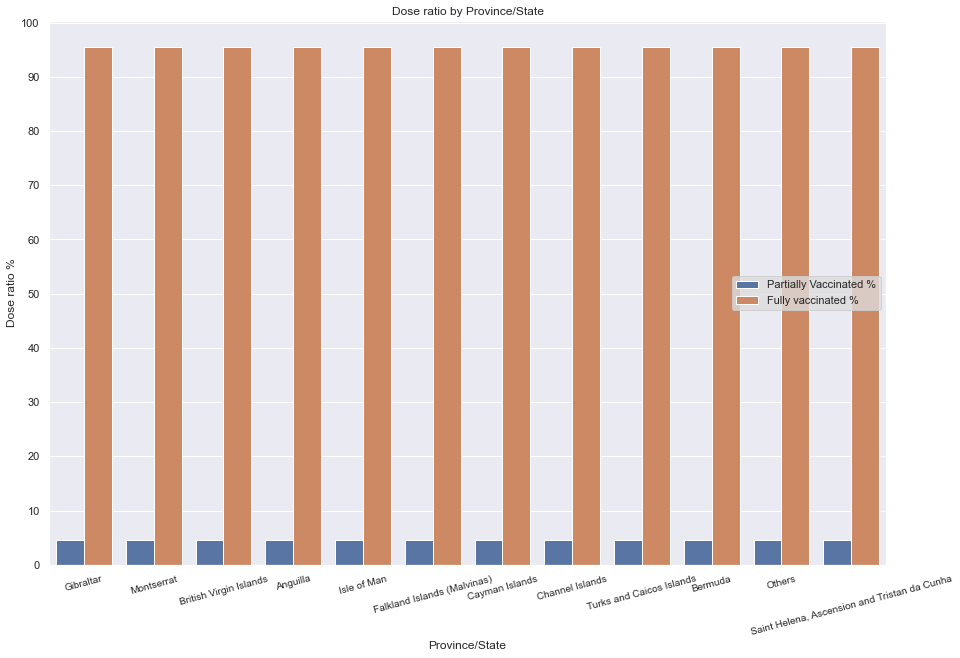

In [24]:
# Reshape the data by location format from wide to long-form in preparation.
covid_by_state.reset_index(inplace=True)

covid_doses = covid_by_state.melt(id_vars=['Province/State', 'Vaccinated',
                   'First Dose', 'Second Dose', 'Deaths', 'Cases', 'Recovered',
                   'Hospitalised', 'Partially Vaccinated'],
                                var_name='Dose type', value_name='Dose ratio %')

# Create a grouped bar plot to show dose ratios by Province.
sns.barplot(x='Province/State', y='Dose ratio %', hue='Dose type', estimator=sum, data=covid_doses)

# Add a title to the chart.
plt.title('Dose ratio by Province/State')

# Set style for background colour and axis lines.
sns.set_style('ticks',{'axes.facecolor': '#dddddd',
                       'axes.spines.left': True,
                       'axes.spines.bottom': True,
                       'axes.spines.top': False,
                       'axes.spines.right': False})

# Specify legend position to clearly present the data.
plt.legend(loc='center right')

# Rotate ticks to ensure easily readable along axis.
plt.xticks(rotation = 15, size = 10)

# Add tick intervals to the y axis.
plt.yticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

plt.show()

###### Observations: 
The chart shows the dose ratios across all states appear to be relatively constant as at October 2021, with the majority (>95%) of eligible individuals being fully vaccinated.

###### Visualising daily deaths
A lineplot will be used to display the trend of deaths accross all regions over time.
In our previous analysis when reviewing aggregated data over time, it was noted that the 'Others' category appeared to skew the data. The lineplot has therefore been presented twice, both including and excluding the 'Others' data. This will highlight the impact of potential skew.
A lineplot to show the daily deaths by province has also been created.

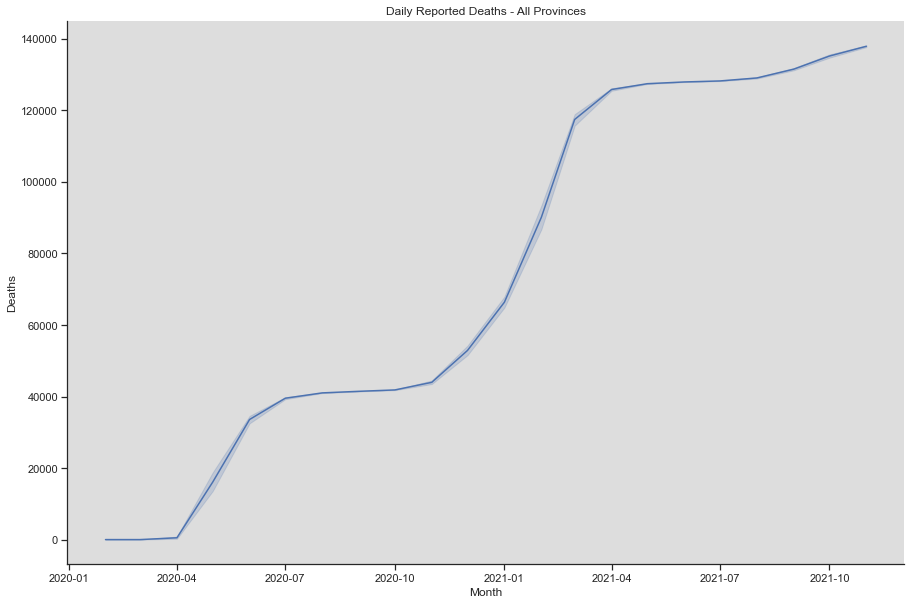

In [25]:
# Create a time series for the lineplot.
covid_deaths = covid.groupby('Date')[['Deaths']].sum().reset_index().copy()
covid_deaths['Month'] = pd.to_datetime(covid_deaths['Date'])+pd.offsets.MonthBegin(0)

# Create the lineplot.
ax = sns.lineplot(x='Month', y='Deaths', data=covid_deaths)
sns.set(rc = {'figure.figsize':(15,8)})

# Add a title to the chart.
plt.title('Daily Reported Deaths - All Provinces')

# Set style for background colour and axis lines.
sns.set_style('ticks',{'axes.facecolor': '#dddddd',
                       'axes.spines.left': True,
                       'axes.spines.bottom': True,
                       'axes.spines.top': False,
                       'axes.spines.right': False})

plt.show()

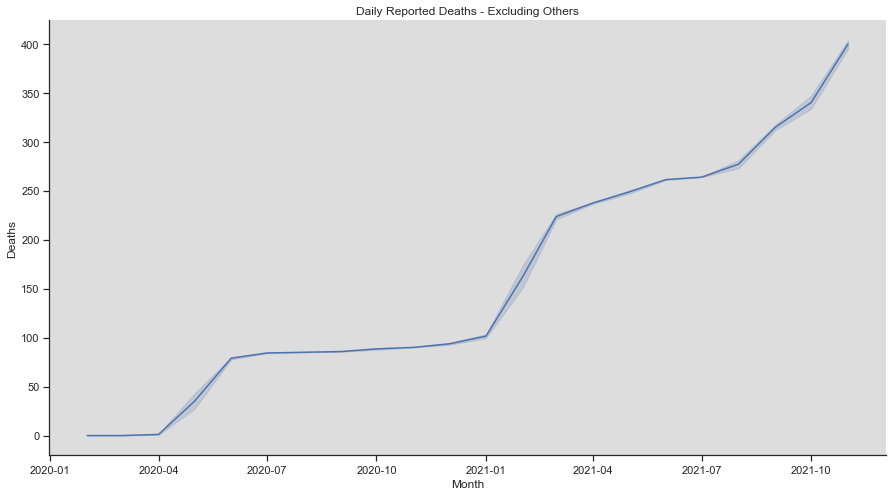

In [26]:
# Remove 'Others' category which is skewing the data.
covid_excl_other = covid[covid['Province/State'] != 'Others']

# Group the updated data and create month column
covid_deaths_updated = covid_excl_other.groupby('Date')[['Deaths']].sum().reset_index().copy()
covid_deaths_updated['Month'] = pd.to_datetime(covid_deaths_updated['Date'])+pd.offsets.MonthBegin(0)

# Create the lineplot.
ax = sns.lineplot(x='Month', y='Deaths', data=covid_deaths_updated)
sns.set(rc = {'figure.figsize':(15,8)})

# Add a title to the chart.
plt.title('Daily Reported Deaths - Excluding Others')

# Set style for background colour and axis lines.
sns.set_style('ticks',{'axes.facecolor': '#dddddd',
                       'axes.spines.left': True,
                       'axes.spines.bottom': True,
                       'axes.spines.top': False,
                       'axes.spines.right': False})

plt.show()

C:\Users\polly\AppData\Local\Temp/ipykernel_153736/539818300.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_excl_other['Month'] = pd.to_datetime(covid_excl_other['Date'])+pd.offsets.MonthBegin(0)


Text(0.5, 1.0, 'Daily Report Deaths by Province - Excluding Others')

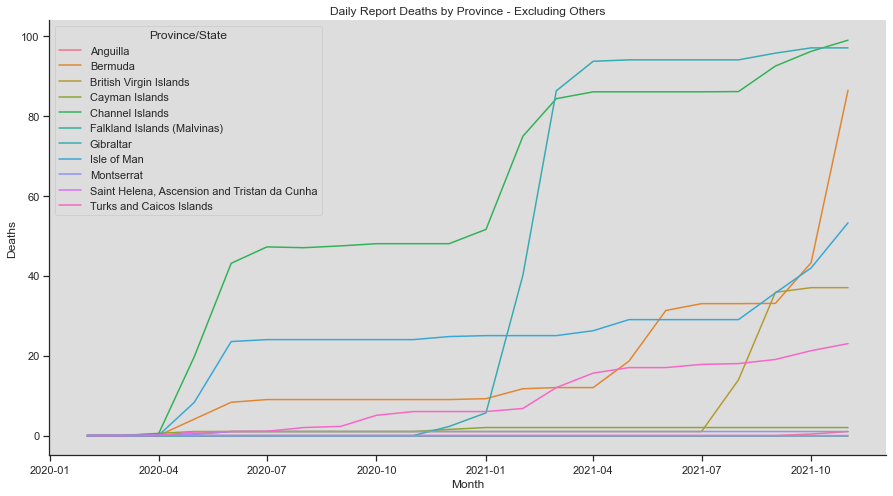

In [27]:
# Create lineplot to show recoveries by province
covid_excl_other['Month'] = pd.to_datetime(covid_excl_other['Date'])+pd.offsets.MonthBegin(0)
ax = sns.lineplot(x='Month', y='Deaths', data=covid_excl_other, hue='Province/State', ci=None)

"""Warning likely to appear when code run - this does not impact analysis"""

# Add a title to the chart.
plt.title('Daily Report Deaths by Province - Excluding Others')

###### Observations:
Overall daily reported deaths are continuing to rise. 
When reviewing by location, there appears to be a sharp increase in Bermuda and Isle of Man just before October 2021. For all other provinces, daily deaths are beginning to flatten and there are early signs the daily deaths are being to come down in Gibraltar.



###### Visualising daily recoveries
Two line plots have been created to show the daily number of recoveries over time. The data has been presented to show results for all provinces and by location.

Text(0.5, 1.0, 'Daily Reported Recoveries - All Provinces')

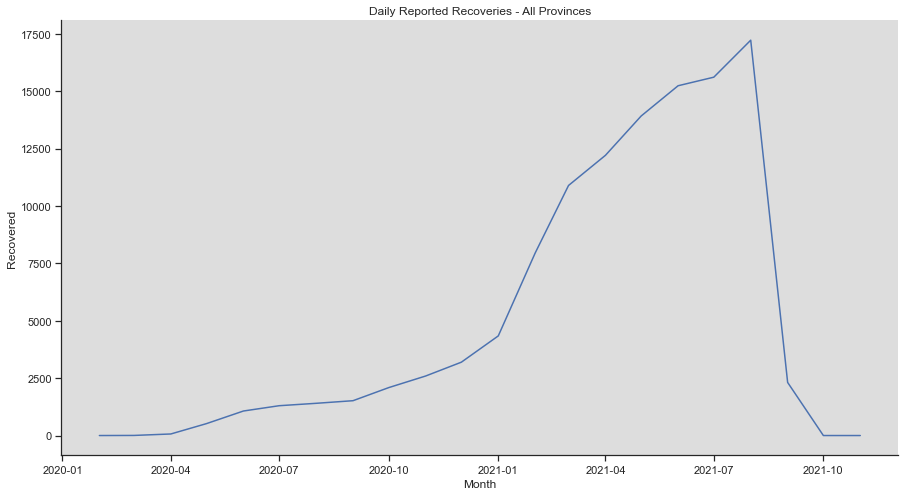

In [28]:
# Group data by date and count of recoveries.
covid_recovered = covid.groupby('Date')[['Recovered']].sum().reset_index().copy().sort_values(by='Recovered')
covid_recovered['Month'] = pd.to_datetime(covid_recovered['Date'])+pd.offsets.MonthBegin(0)

# Create linepot
ax = sns.lineplot(x='Month', y='Recovered', data=covid_recovered, ci=None)

# Add a title to the chart.
plt.title('Daily Reported Recoveries - All Provinces')


Text(0.5, 1.0, 'Daily Report Recoveries by Province - Excluding Others')

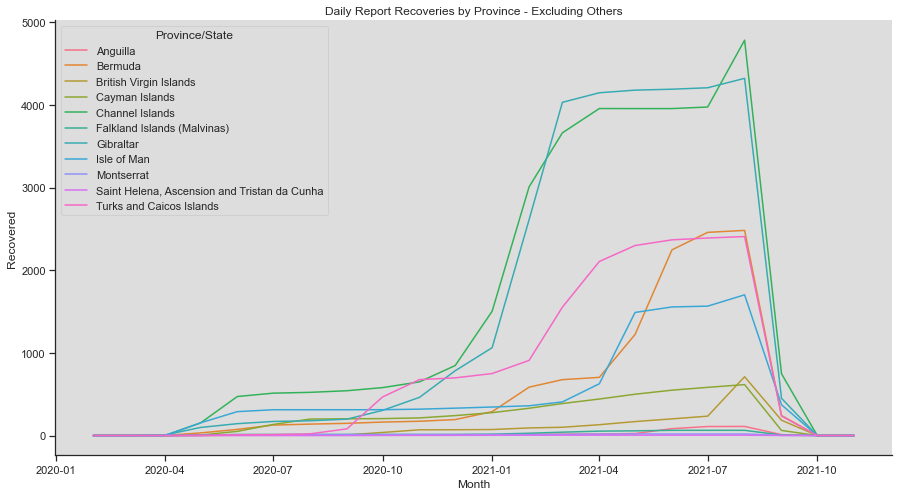

In [29]:
# Create lineplot to show recoveries by province
ax = sns.lineplot(x='Month', y='Recovered', data=covid_excl_other, hue='Province/State', ci=None)

# Add a title to the chart.
plt.title('Daily Report Recoveries by Province - Excluding Others')

###### Observations:
The lineplots shoe a sharp increase in recoveries from around January 2021 which corresponds to the introduction of the vaccine. The increase in daily recovery rates by province also corresponds to a slow of increasing daily deaths presented in the previous plots.
A significant drop in recoveries from around September 2021 is due to no data provided after this point, and the decline should be ignored for the purposes of the analysis.

***Notes and observations:***
Your observations here. (Double click to edit)

***Examples could include:***
- Are there other trends in terms of recoveries or hospitalisations compared to other features that you found interesting and that may add value in terms of the decision making process?
- Any other observations regarding the data?
- Any suggestions for improvements and further analysis?
- What would your future data requirements be?

## 5) Assignment activity 5: External data 
In the next section, you were supplied with a sample file and the question was asked to determine whether there are additional `#tags` or keywords that could potentially provide insights into your COVID-19 analysis. While the sample set is limited, you were asked to review the provided file and demonstrate the typical steps and make recommendations regarding future use of similar data sets to provide richer insights.

### 5.1) Report expectations:
- Demonstrate basic ability to work with Twitter data.
- Search for hash-tags or keywords.
- Create DataFrames and visualisations.
- Note your observations.

In [30]:
# Import the tweet data set
tweets = pd.read_csv('tweets.csv')

In [31]:
# Explore the data to understand shape and get info
print(tweets.shape)
tweets.info()

(3960, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   created_at                 3959 non-null   object 
 1   id                         3959 non-null   float64
 2   id_str                     3959 non-null   float64
 3   text                       3959 non-null   object 
 4   truncated                  3959 non-null   object 
 5   source                     3959 non-null   object 
 6   in_reply_to_status_id      0 non-null      float64
 7   in_reply_to_status_id_str  0 non-null      float64
 8   in_reply_to_user_id        0 non-null      float64
 9   in_reply_to_user_id_str    0 non-null      float64
 10  in_reply_to_screen_name    0 non-null      float64
 11  contributors               0 non-null      float64
 12  is_quote_status            3959 non-null   object 
 13  retweet_count              3960 non-n

In [32]:
# View the first five lines.
tweets.head()

,created_at,id,id_str,text,truncated,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,...,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang,possibly_sensitive,quoted_status_id,quoted_status_id_str
0,23/05/2022,1.528750e+18,1.528750e+18,READ MY NEW OP-ED: IRREVERSIBLE – Many Effects...,False,"<a href=""https://www.socialjukebox.com"" rel=""n...",NaN,NaN,NaN,NaN,...,NaN,False,0,0,False,False,en,False,NaN,NaN
1,23/05/2022,1.528720e+18,1.528720e+18,#COVID19 is linked to more #diabetes diagnoses...,False,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,...,NaN,False,0,1,False,False,en,False,NaN,NaN
2,23/05/2022,1.528650e+18,1.528650e+18,READ MY NEW OP-ED: IRREVERSIBLE – Many Effects...,False,"<a href=""https://www.socialjukebox.com"" rel=""n...",NaN,NaN,NaN,NaN,...,NaN,False,0,0,False,False,en,False,NaN,NaN
3,23/05/2022,1.528610e+18,1.528610e+18,READ MY NEW OP-ED: IRREVERSIBLE – Many Effects...,False,"<a href=""https://www.socialjukebox.com"" rel=""n...",NaN,NaN,NaN,NaN,...,NaN,False,0,0,False,False,en,False,NaN,NaN
4,23/05/2022,1.528600e+18,1.528600e+18,Advanced healthcare at your fingertips\nhttps:...,False,"<a href=""https://about.twitter.com/products/tw...",NaN,NaN,NaN,NaN,...,NaN,False,0,0,False,False,en,False,NaN,NaN


Look at elemenents of the data, including number of favourties and retweets, to determine whether they are worth exploring further.

In [33]:
# Explore the structure, count the tweets, get the elements of interest
# How many retweets.
tweets.retweet_count.value_counts()

0       2818
1        570
2        190
3         96
4         54
5         33
6         29
7         17
8         14
11        10
14        10
10         9
9          8
17         8
21         6
12         6
19         5
13         5
16         5
28         4
44         3
27         3
23         3
15         3
37         3
38         2
107        2
54         2
67         2
43         2
25         2
65         1
63         1
48         1
85         1
29         1
30         1
22         1
130        1
89         1
398        1
18         1
32         1
466        1
112        1
90         1
319        1
253        1
116        1
304        1
60         1
79         1
1565       1
369        1
56         1
42         1
118        1
199        1
195        1
963        1
24         1
31         1
49         1
33         1
261        1
212        1
52         1
Name: retweet_count, dtype: int64

In [34]:
# How many favourited
tweets.favorite_count.value_counts()

0       2240
1        682
2        252
3        174
4        100
5         75
6         51
7         39
8         38
9         24
10        22
11        16
13        15
12        13
17        12
14        12
24        11
15        11
18         8
16         8
25         7
19         7
22         6
29         5
20         5
23         5
21         5
30         4
39         3
31         3
26         3
40         3
53         3
242        2
27         2
81         2
32         2
47         2
48         2
45         2
89         2
43         2
70         2
33         2
185        2
28         2
65         2
181        1
57         1
71         1
293        1
145        1
621        1
837        1
80         1
149        1
909        1
2251       1
44         1
4376       1
1003       1
66         1
140        1
264        1
72         1
3496       1
649        1
766        1
722        1
79         1
317        1
228        1
85         1
169        1
183        1
147        1
582        1

###### Observations:
For now, we will hold the analysis of the favorited and retweets as at this stage there may be more valuable insights from further exploring the hastags and text columns. 



###### Analysis of hastags
The first step is to review the text column in the data set to highlight tweets containing hastags. The next step is to then identify the top trending hashtags.

In [35]:
# Create a DataFrame with the text only and stip out the data
tweets['text'] = tweets['text'].astype(str)
tweets_text=tweets['text'].apply(lambda x: x if x.strip() !=None else None)

In [36]:
# Loop through the messages and build a list of values containing the #-symbol
tags = []
for y in [x.split(' ') for x in tweets_text.values]:
    for z in y:
        if '#' in z:
            tags.append(z)
            
# Create a series to include the counts in the list.
tags=pd.Series(tags).value_counts()

# View the first 30 rows
tags.head(30)

#COVID19                1632
#CovidIsNotOver          472
#China                   262
#covid19                 176
#Covid19                 148
#COVID                   108
#covid                   104
#Greece                  103
#coronavirus             100
#PeoplesVaccine.          84
#CoronaUpdate             84
#Omicron                  83
#COVID2020                82
#covid19uk                80
#CoronavirusOutbreak      80
#COVID19Pandemic          80
#monkeypox                77
#globalhealth             76
#publichealth             72
#healthtech               69
#COVID2019                69
#datascience              66
#data                     66
#analytics                64
#Shanghai                 63
#Covid_19                 63
#datavisualization        63
#pandemic                 60
#Athens                   55
#Beijing                  50
dtype: int64

The top 30 records show that covid appears frequently within  hashtags based on this initial analysis. To visualise and explore further we will create a DataFrame and view the top trending hashtags relating to COVID.

In [37]:
# Create a DataFrame from the Series data.
tweets_df = pd.DataFrame(tags).reset_index()

# Add column names.
tweets_df.columns = ['Topic', 'Count']

# Convert count column to integer data type.
tweets_df['Count'] = tweets_df['Count'].astype(int)

# View output.
tweets_df

,Topic,Count
0,#COVID19,1632
1,#CovidIsNotOver,472
2,#China,262
3,#covid19,176
4,#Covid19,148
5,#COVID,108
6,#covid,104
7,#Greece,103
8,#coronavirus,100
9,#PeoplesVaccine.,84


Given the high number of rows of data, we will only visualise the top 11 hastags (ie. those with a count of 84 or more)

Text(0.5, 1.0, ' Top hashtags by count')

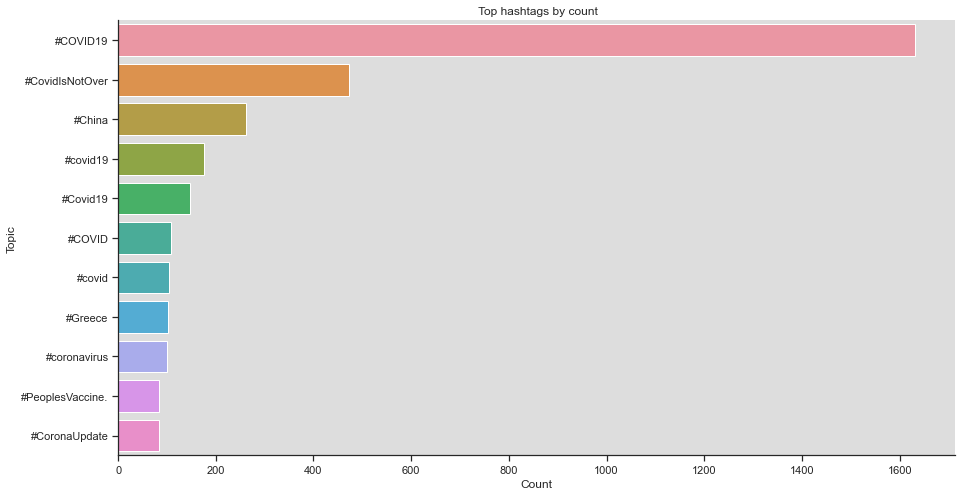

In [38]:
# Create bar plot for top 10 hastags.
ax = sns.barplot(x='Count', y='Topic', data=tweets_df.loc[(tweets_df['Count']>83)])

plt.title(' Top hashtags by count')


###### Observations:
The chart above helps visualise that 9 out of 11 of the top hastags relate to covid and or vaccines indicating that clearly covid is a hot topic, trending on twitter.




###### Analysis of twitter text 
Now we know that covid is a popular, trending topic on twitter, the next step of analysis is to review the text contents of the covid related tweets.
This analysis will be performed by looking for frequently used words.
A list of stopwords, based on NLTK's list of english stopwords, have been manually removed. The list used in the code has been obtained from https://gist.github.com/sebleier/554280 .

In [39]:
# Create a list of stopwords to be removed
sw_list = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", 
           "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", 
           "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which",
           "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", 
           "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a",
           "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", 
           "by", "for", "with", "about", "against", "between", "into", "through", "during", "before",
           "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", 
           "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", 
           "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", 
           "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just",
           "don", "should", "now", "I'm", "get", "via","way", "like", "per"]

In [40]:
# Create list of tweets by converting text of tweets and create list of works.
tweets_text_values = tweets_text.values
tweets_text_values_words = [x.split(' ') for x in tweets_text_values]


# Loop through the messages and build a list of values containing the #-symbol
tweets_text_values_all = []

tweets_text_values_all = [z for y in tweets_text_values_words for z in y if 'http' not in z
                         and not z.startswith(('#','-', '&', '@')) and z.lower() not in sw_list]

# Create a series to include the counts in the list.
tweets_text_values_all=pd.Series(tweets_text_values_all).value_counts()

# View the first 30 entries.
tweets_text_values_all.head(15)
                                                 

            1738
Covid        348
people       303
Greece       275
COVID-19     267
cases        228
Athens,      211
Athens       209
new          205
COVID        198
Covid-19     153
vaccine      147
COVID19      143
China        141
covid        140
dtype: int64

Text(0.5, 1.0, 'Frequently used words by count')

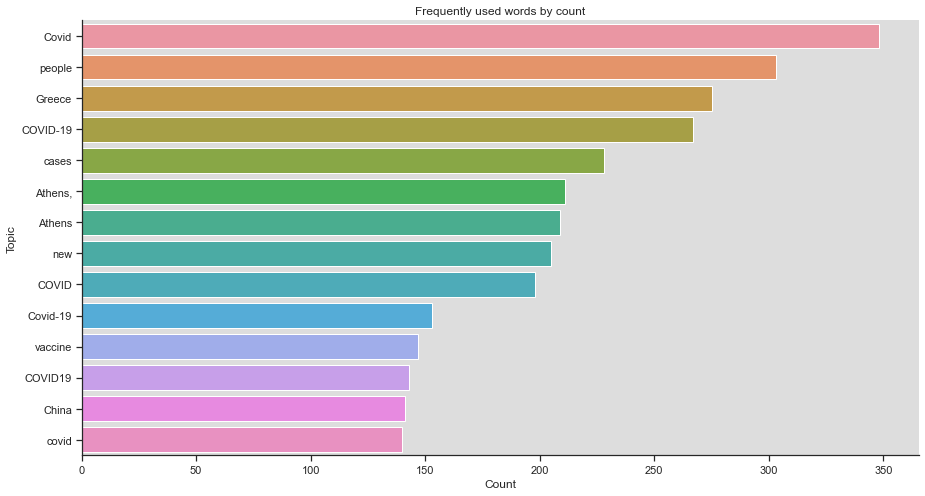

In [41]:
# Create DataFrame to visualise the data.
twitter_text_df = pd.DataFrame(tweets_text_values_all.head(15)).reset_index()

# Create columns
twitter_text_df.columns = ['Topic', 'Count']

# Strip out whitespace to remove blank rows in Topic column
twitter_text_df = twitter_text_df[twitter_text_df['Topic'].str.strip('Topic') != '']

# Create barplot to visualise results
ax = sns.barplot(x='Count', y='Topic', data=twitter_text_df)

plt.title('Frequently used words by count')

###### Observations:
As with the trends in hastags, we can see the covid is a top and popular topic for discussion within the main text of tweets.

### 5.2) Presentation expectations:
Discuss whether external data could potentially be used and whether it is a viable solution to pursue. Discuss your assumptions and suggestions. 

Points to consider:
- What insights can be gained from the data?
- What are the advantages and disadvantages of using external data?
- How would you suggest using external data in the project?

## 6) Assignment activity 6: 

### 6.1) Report expectations:
- Demonstrate using external function and interpret results.
- Note observations.

The government employed an external consultant to assist with data analysis. However, the consultant resigned and left the project in a half-completed state. The government provide the partially completed Jupyter Notebook that the consultant developed. We have been asked to evaluate and complete the Jupyter Notebook with Python code.

In [42]:
# Load and select relevant subset of the data
# Make sure to change the relative path to function in your environment
ds1 = pd.read_csv('covid_19_uk_cases.csv')
ds2 = pd.read_csv('covid_19_uk_vaccinated.csv')

sample = ds1[['Province/State','Date','Hospitalised']]

In [43]:
# Select data for a specific province
sample_ci = sample[sample['Province/State'] == "Channel Islands"]

In [44]:
# Define function to plot moving averages
def plot_moving_average(series, window, plot_intervals=False, scale=1.96):
    
    # Create a rolling window to calculate the rolling mean using the series.rolling function
    rolling_mean = series.rolling(window=window).mean()
    
    # Declare the dimensions for the plot, plot name and plot the data consisting of the rolling mean from above 
    plt.figure(figsize=(18,4))
    plt.title('Moving average\n window size = {}'.format(window))
    plt.plot(rolling_mean, 'g', label='Simple moving average trend')

    
    # Plot confidence intervals for smoothed values
    if plot_intervals:
        
        # Calculate the mean absolute square 
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        
        # Calculate the standard deviation using numpy's std function
        deviation = np.std(series[window:] - rolling_mean[window:])
        
        # Calculate the upper and lower bounds 
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        
        # Name and style upper and lower bound lines and labels 
        plt.plot(upper_bound, 'r--', label='Upper bound / Lower bound')
        plt.plot(lower_bound, 'r--')
    
    # Plot the actual values for the entire timeframe
    plt.plot(series[window:], label='Actual values')
    plt.grid(True)

In [45]:
# Define function to calculate the mean absolute error
def mean_absolute_error(a, b): return abs(b - a)

###### Question 1:

The consultant indicated that the function is functional, but did not demonstrate how to use it. Use the provided function, `plot_moving_average()`, to plot the data for the selected province (variable name is `sample_ci` and set the window parameter to 7 days.

In [46]:
# Reset the index to Date
sample_ci.index = pd.DatetimeIndex(sample_ci['Date'])

# View the first five rows of data.
sample_ci.head()

,Province/State,Date,Hospitalised
Date,,,
2020-01-22,Channel Islands,2020-01-22,0.0
2020-01-23,Channel Islands,2020-01-23,0.0
2020-01-24,Channel Islands,2020-01-24,0.0
2020-01-25,Channel Islands,2020-01-25,0.0
2020-01-26,Channel Islands,2020-01-26,0.0


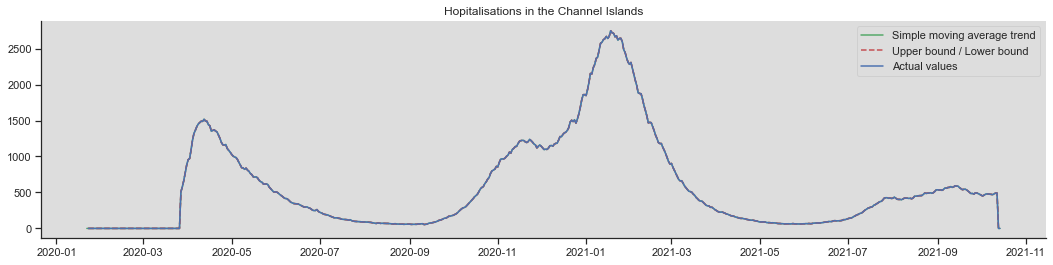

In [47]:
# Plot the moving average across the entire time frame.
plot_moving_average(sample_ci.Hospitalised, 1 , plot_intervals=True)
plt.title('Hopitalisations in the Channel Islands')
plt.legend(loc='best')
plt.grid(False)

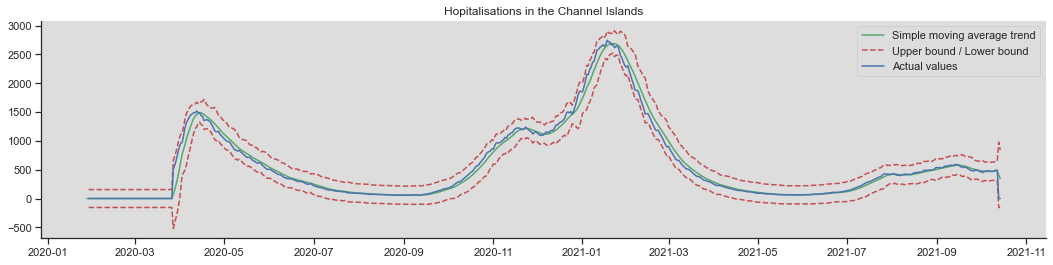

In [48]:
# Plot the moving average over a 7 day window.
plot_moving_average(sample_ci.Hospitalised, 7, plot_intervals=True)
plt.title('Hopitalisations in the Channel Islands')
plt.legend(loc='best')
plt.grid(False)

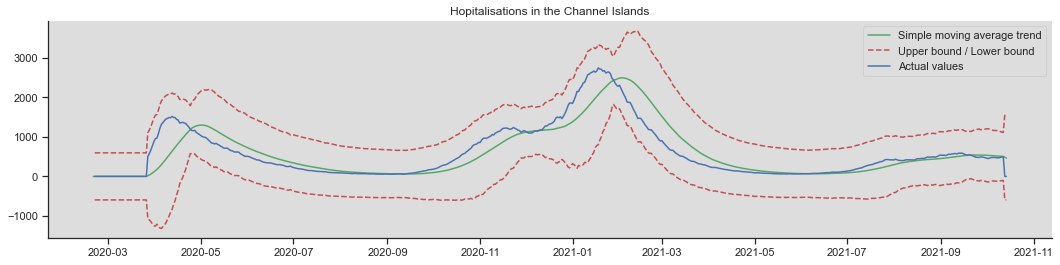

In [49]:
# Plot the moving average over a 30 day window.
plot_moving_average(sample_ci.Hospitalised, 30, plot_intervals=True)
plt.title('Hopitalisations in the Channel Islands')
plt.legend(loc='best')
plt.grid(False)

###### Observations:
The SMA chart has been displayed over three window sizes; daily, 7 days and 30 days. The charts demonstrate the smoothing on the chart as the window increases.

The charts clearly show two main peaks in hospitalisations in May 2020 and around February 2021. This also corresponds to a significant increase in daily deaths in early 2021.

Hopsitalisations tail off following the peak in early 2021 which correlates to the introduction of the vaccine.

### 6.2) Presentation expectations:


- **Question 1**: We have heard of both qualitative and quantitative data from the previous consultant. What are the differences between the two? Should we use only one or both of these types of data and why? How can these be used in business predictions? Could you provide examples of each?

Data typically falls between two types, qualitative and quantitative:
•	Qualitative data is based on interpretation, and incorporates different groupings and descriptions. This type of data allows us to understand why, how or what has happened when driven by behaviours or emotion. Examples include; colour, yes/no, emotions.
•	Quantitative data is numeric, countable or measurable information that can be used in calculations. It is this type of data that lends itself to the most statistical analysis and allows us to understand how many, how much or how often.
Examples include; distance (km/m), time(m/h/s)

Analysing both qualitative and quantitative data together will allow you to gain much deeper insights that using just one type of data alone. This is beneficial as you can begin to understand and align the ‘What’ and ‘Why’ together which will create better informed decision making.

- **Question 2**: We have also heard a bit about the need for continuous improvement. Why should this be implemented, it seems like a waste of time. Why can’t we just implement the current project as it stands and move on to other pressing matters?

Continuous improvement is crucial in ensuring overall processes and overall quality is improved, for example by reducing inefficiencies and wasted time. Continual improvement can be made through small, but impactful changes, and is especially effective if an organisation can implement a culture throughout the business.
Without continuously reflecting on how to improve processes, the organisation is unlikely to keep up within a dynamic environment (e.g. staying ahead of its competitors) and will repeat unfavourable elements of performance.


- **Question 3**: As a government, we adhere to all data protection requirements and have good governance in place. We only work with aggregated data and therefore will not expose any personal details. Have we covered everything from a data ethics standpoint? Is there anything else we need to implement from a data ethics perspective? 

When dealing with data, it is important to ensure all individuals within the organisation  are aware of and adhere to the legal requirements and governance practices. As well as this, you should consider not just the basic legal requirements , but also the ethical implications of handling data. 
I would recommend the implementation of a robust ethics framework which will ensure ethical data practices and uses meet the expectations of the public and other stakeholders.
The framework should define data ownership and responsibility to cover who is responsible for areas such as data collection and processing. The framework should be regularly revisiting and tested to ensure it is being implemented effectively.